## Running Environment

In [ ]:
IS_COLAB = True # Set this as False when running locally


## Mount Drive

In [ ]:
if IS_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    %cd drive/MyDrive/Projects/af-detection
    # !ls


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: 'drive/MyDrive/Projects/af-detection'
/content/drive/MyDrive/Projects/af-detection


## Choice of Augmentation

In [ ]:
AUGMENTION_IS_NEEDED = True


## Load libraries

In [ ]:
import numpy as np
from sklearn.utils import shuffle
from Evaluation import evaluation
import gc


## Load AF Samples

In [ ]:
af_images = np.load(
'/content/drive/MyDrive/afImages.npy') # 360 x 360 AF samples
print('af_images.shape: ', af_images.shape)


af_images.shape:  (758, 360, 360)


## Split AF Samples Into 4 Folds

In [ ]:
af_images = shuffle(af_images)
partitionIndex = af_images.shape[0] // 4
af_1 = af_images[:partitionIndex, :, :]
print('af_1.shape: ', af_1.shape)
af_2 = af_images[partitionIndex:2*partitionIndex, :, :]
print('af_2.shape: ', af_2.shape)
af_3 = af_images[2*partitionIndex:3*partitionIndex, :, :]
print('af_3.shape: ', af_3.shape)
af_4 = af_images[3*partitionIndex:, :, :]
print('af_4.shape: ', af_4.shape)
del af_images
gc.collect()

af_1.shape:  (189, 360, 360)
af_2.shape:  (189, 360, 360)
af_3.shape:  (189, 360, 360)
af_4.shape:  (191, 360, 360)


0

## Generate AF Samples If Needed

initial size:  (189, 360, 360)
after cropping:  (189, 274, 274)
after interpolation:  (189, 188, 188)
Input Shape:  (189, 188, 188, 1)
Reshaped SAMPLES:  (6680016, 1)
Shape of the scaled array:  (189, 188, 188, 1)
Model: "Generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Generator-Hidden-Layer-1 (D  (None, 6680016)          674681616 
 ense)                                                           
                                                                 
 Generator-Hidden-Layer-Resh  (None, 188, 188, 189)    0         
 ape-1 (Reshape)                                                 
                                                                 
 Generator-Output-Layer (Con  (None, 188, 188, 1)      4726      
 v2D)                                                            
                                                                 
Total params: 674,686,342
Trainable param

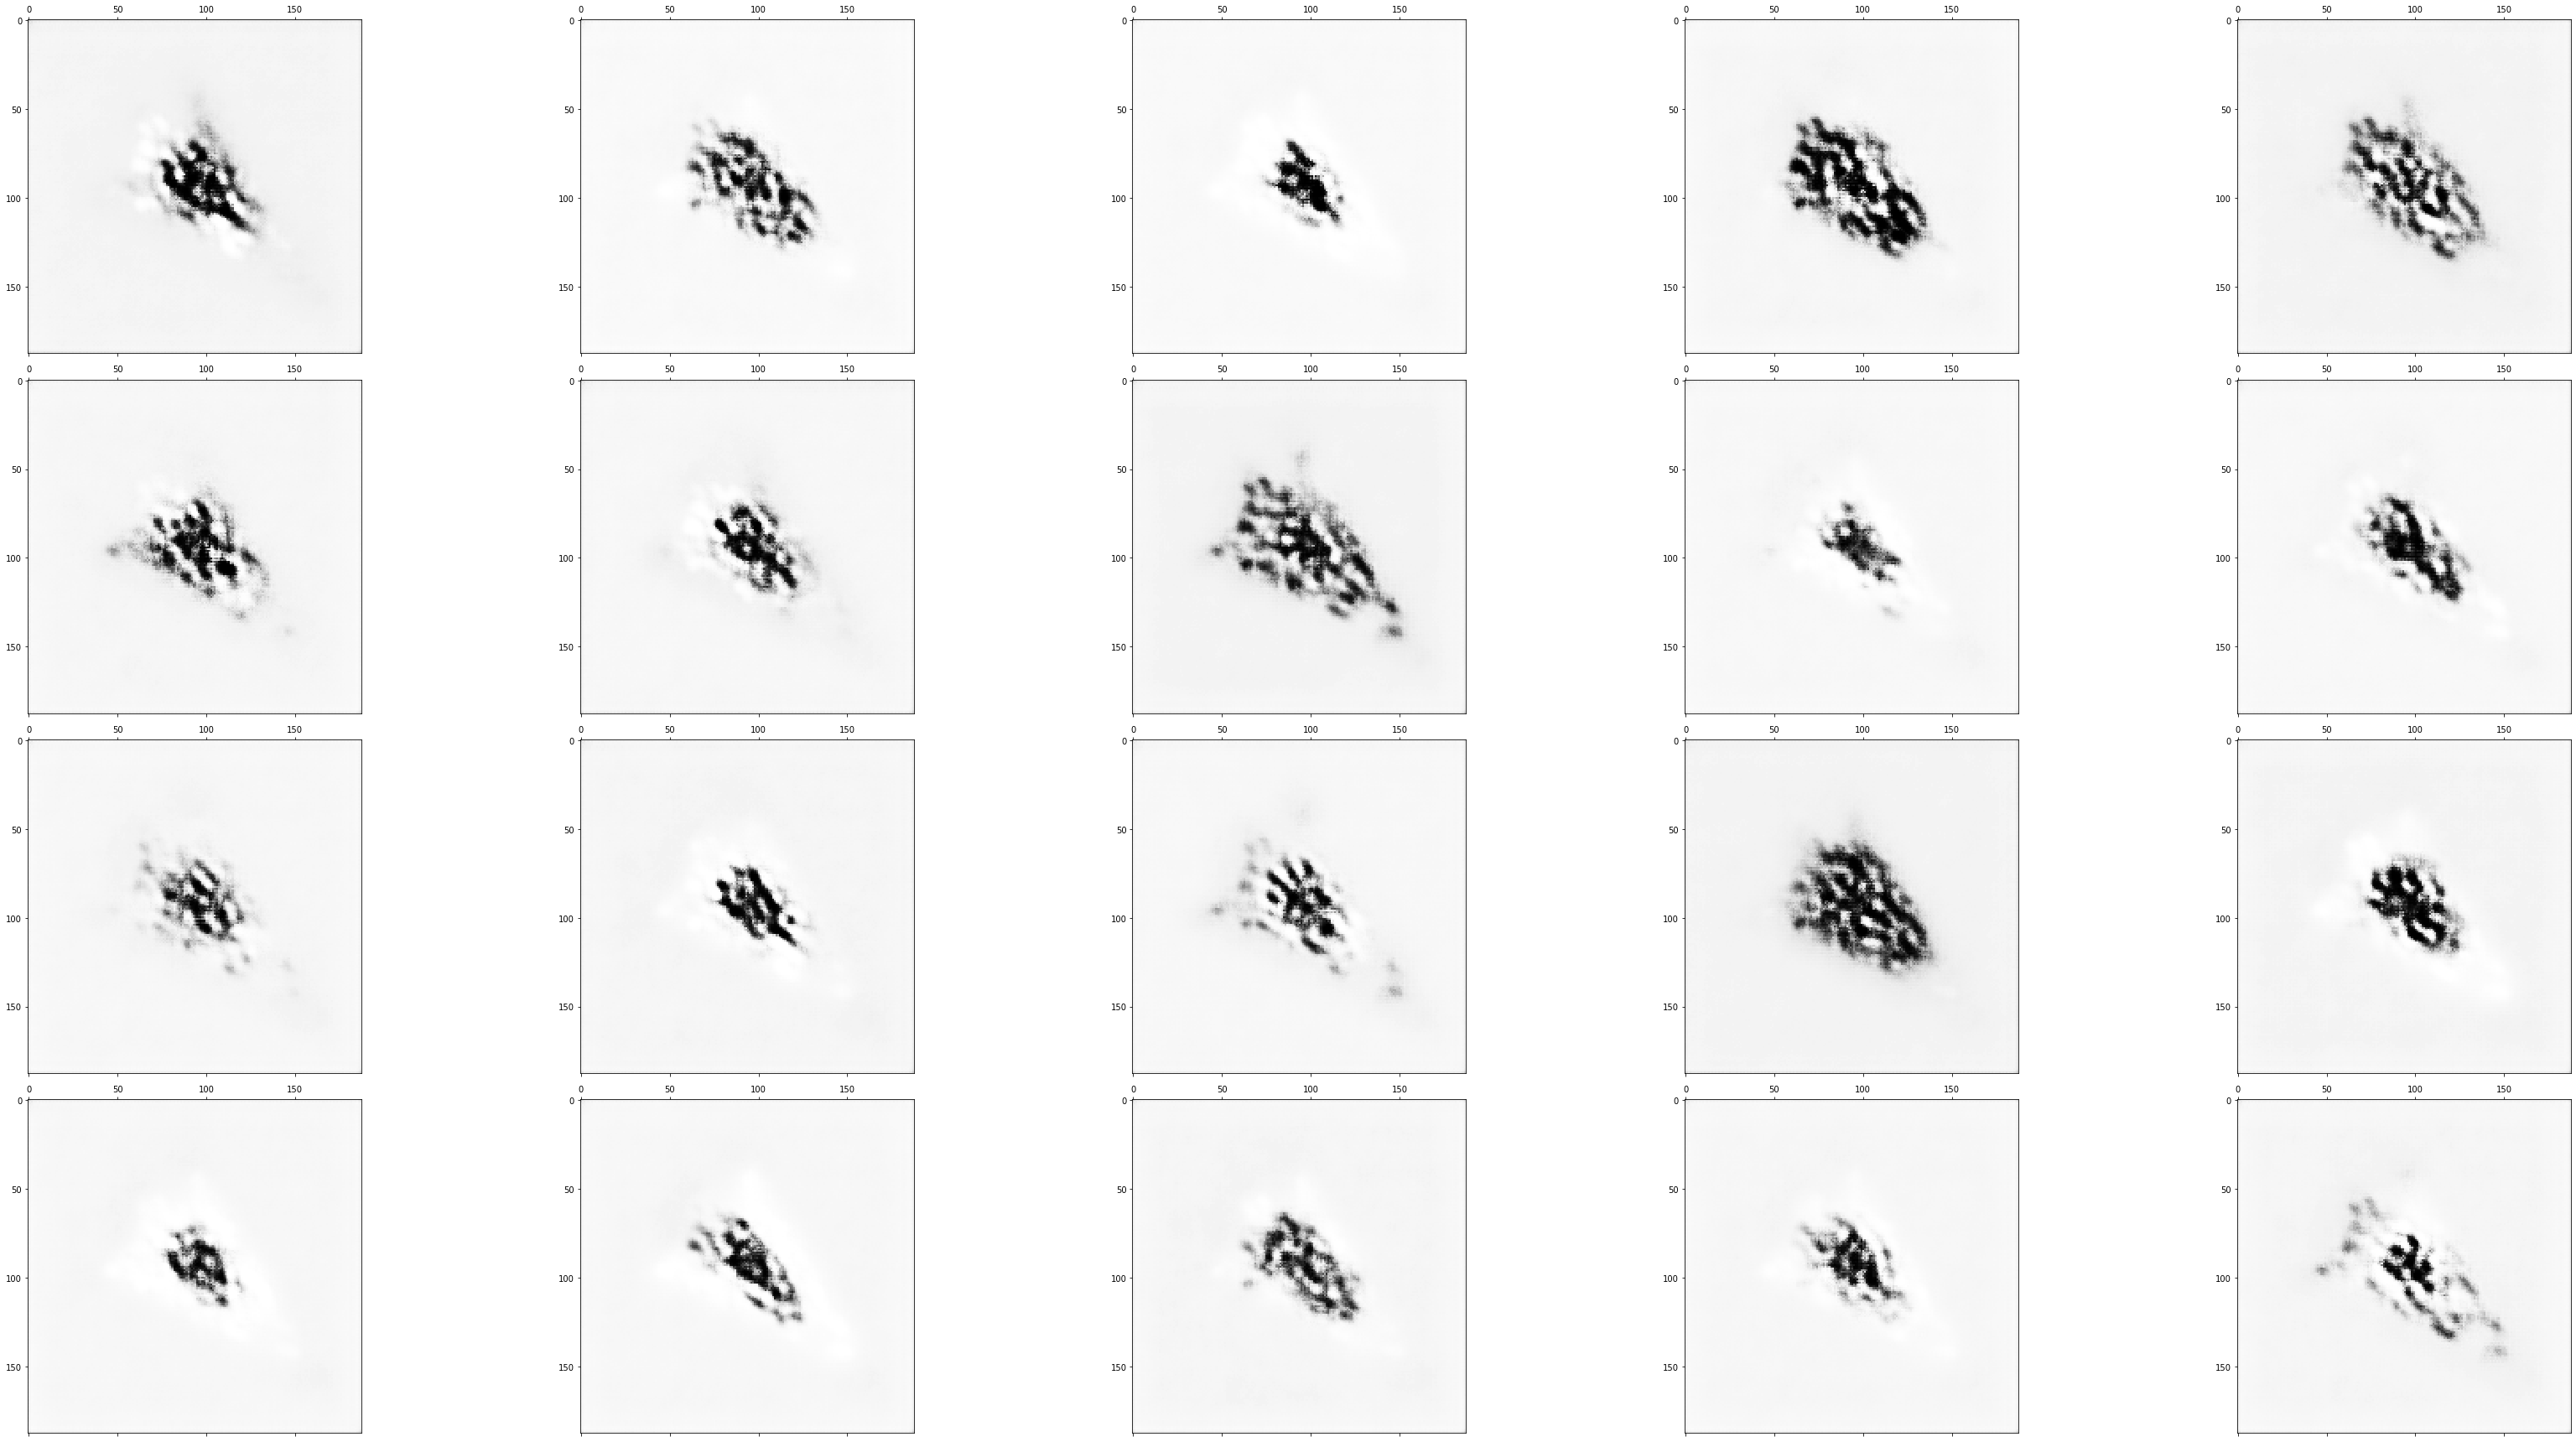

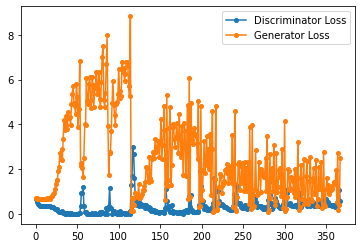

8/8 [==============================] - 1s 83ms/step
after interpolation:  (226, 360, 360)
augment_1.shape:  (226, 360, 360)
initial size:  (189, 360, 360)
after cropping:  (189, 288, 288)
after interpolation:  (189, 188, 188)
Input Shape:  (189, 188, 188, 1)
Reshaped SAMPLES:  (6680016, 1)
Shape of the scaled array:  (189, 188, 188, 1)
Model: "Generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Generator-Hidden-Layer-1 (D  (None, 6680016)          674681616 
 ense)                                                           
                                                                 
 Generator-Hidden-Layer-Resh  (None, 188, 188, 189)    0         
 ape-1 (Reshape)                                                 
                                                                 
 Generator-Output-Layer (Con  (None, 188, 188, 1)      4726      
 v2D)                                            

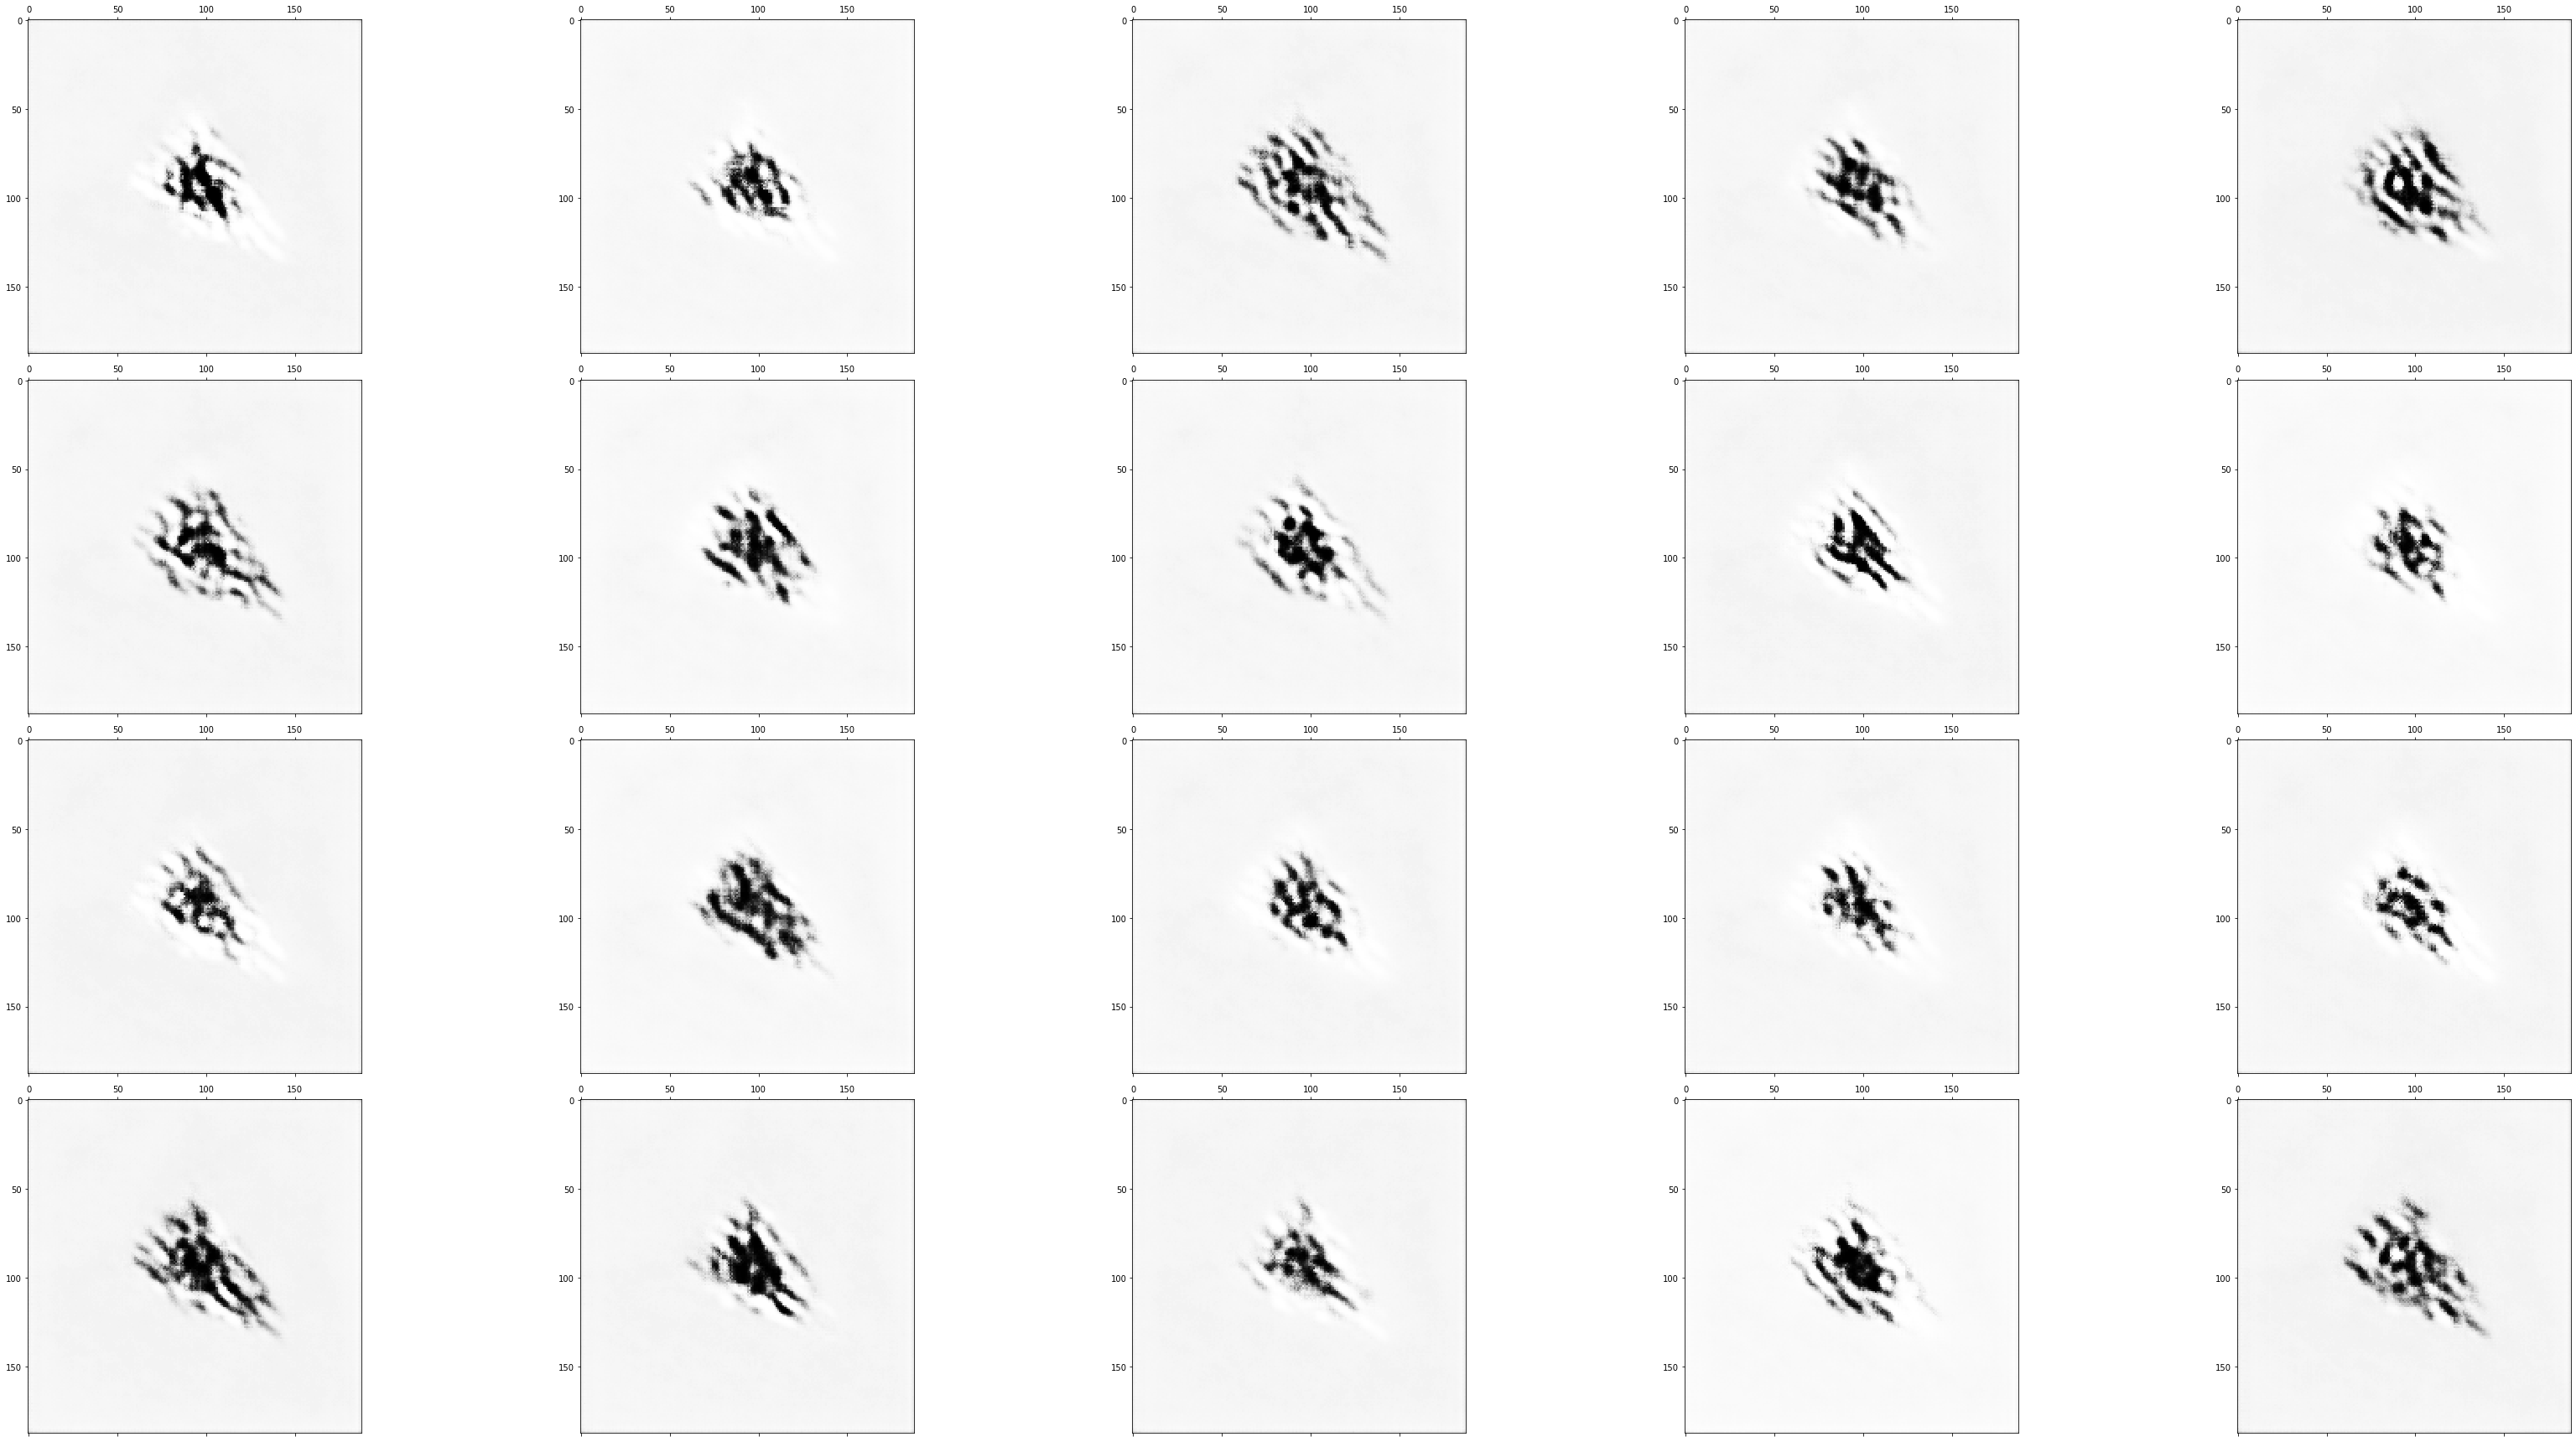

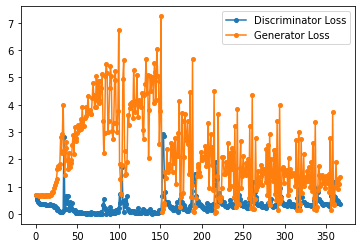

8/8 [==============================] - 0s 65ms/step
after interpolation:  (226, 360, 360)
augment_2.shape:  (226, 360, 360)
initial size:  (189, 360, 360)
after cropping:  (189, 288, 288)
after interpolation:  (189, 188, 188)
Input Shape:  (189, 188, 188, 1)
Reshaped SAMPLES:  (6680016, 1)
Shape of the scaled array:  (189, 188, 188, 1)
Model: "Generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Generator-Hidden-Layer-1 (D  (None, 6680016)          674681616 
 ense)                                                           
                                                                 
 Generator-Hidden-Layer-Resh  (None, 188, 188, 189)    0         
 ape-1 (Reshape)                                                 
                                                                 
 Generator-Output-Layer (Con  (None, 188, 188, 1)      4726      
 v2D)                                            

KeyboardInterrupt: ignored

In [ ]:
augment_1 = None
augment_2 = None
augment_3 = None
augment_4 = None

if AUGMENTION_IS_NEEDED:
    from DCGAN import augmentation
    n_fakeImagesEachFold = int(partitionIndex*1.2)
    augment_1 = augmentation(af_1, n_fakeImagesEachFold)
    print('augment_1.shape: ', augment_1.shape)
    augment_2 = augmentation(af_2, n_fakeImagesEachFold)
    print('augment_2.shape: ', augment_2.shape)
    augment_3 = augmentation(af_3, n_fakeImagesEachFold)
    print('augment_3.shape: ', augment_3.shape)
    augment_4 = augmentation(af_4, n_fakeImagesEachFold)
    print('augment_4.shape: ', augment_4.shape)
    del augmentation
    gc.collect()


## Load Normal Images

In [ ]:
normal_images = np.load(
'/content/drive/MyDrive/normal.npy') # 360 x 360 normal samples
print('normal_images.shape: ', normal_images.shape)


## Split Normal Images Into 4 Folds

In [ ]:
normal_images = shuffle(normal_images)
partitionIndex = normal_images.shape[0] // 4
normal_1 = normal_images[:partitionIndex, :, :]
print('normal_1.shape: ', normal_1.shape)
normal_2 = normal_images[partitionIndex:2*partitionIndex, :, :]
print('normal_2.shape: ', normal_2.shape)
normal_3 = normal_images[2*partitionIndex:3*partitionIndex, :, :]
print('normal_3.shape: ', normal_3.shape)
normal_4 = normal_images[3*partitionIndex:, :, :]
print('normal_4.shape: ', normal_4.shape)
del normal_images
gc.collect()

## Round 1

In [ ]:
# Use fold 1 for validation
a = evaluation(normal_4, af_4, augment_4, normal_2, af_2, augment_2,
               normal_3, af_3, augment_3, val_normal=normal_1, val_af=af_1, checkpoint_filepath='./checkpoints/my_checkpoint/best_1', showModelSummary=True)
gc.collect()


## Round 2

In [ ]:
# Use fold 2 for validation
a = evaluation(normal_1, af_1, augment_1, normal_4, af_4, augment_4,
               normal_3, af_3, augment_3, val_normal=normal_2, val_af=af_2, checkpoint_filepath='./checkpoints/my_checkpoint/best_2')
gc.collect()


## Round 3

In [ ]:
# Use fold 3 for validation
a = evaluation(normal_1, af_1, augment_1, normal_2, af_2, augment_2,
               normal_4, af_4, augment_4, val_normal=normal_3, val_af=af_3, checkpoint_filepath='./checkpoints/my_checkpoint/best_3')
gc.collect()


## Round 4

In [ ]:
# Use fold 4 for validation
a = evaluation(normal_1, af_1, augment_1, normal_2, af_2, augment_2,
               normal_3, af_3, augment_3, val_normal=normal_4, val_af=af_4, checkpoint_filepath='./checkpoints/my_checkpoint/best_4')
gc.collect()
